# BFS

In [7]:
import numpy as np
from numba import njit

@njit(cache=True, fastmath=True)
def region_grow_numba(img, seed_r, seed_c, th=5.0, connectivity=4):
    H, W = img.shape
    visited = np.zeros((H, W), np.uint8)
    mask    = np.zeros((H, W), np.uint8)

    # 이웃 오프셋
    if connectivity == 4:
        dr = np.array([-1, 1, 0, 0], np.int32)
        dc = np.array([ 0, 0,-1, 1], np.int32)
    else:
        dr = np.array([-1, 1, 0, 0, -1,-1, 1, 1], np.int32)
        dc = np.array([ 0, 0,-1, 1, -1, 1,-1, 1], np.int32)

    # 원형 큐 (최대 H*W)
    q_r = np.empty(H*W, np.int32)
    q_c = np.empty(H*W, np.int32)
    head = 0
    tail = 0

    # 초기화
    q_r[tail] = seed_r
    q_c[tail] = seed_c
    tail += 1
    visited[seed_r, seed_c] = 1
    mask[seed_r, seed_c] = 1

    mean = float(img[seed_r, seed_c])
    count = 1.0

    while head < tail:
        r = q_r[head]; c = q_c[head]
        head += 1

        for k in range(dr.size):
            rr = r + dr[k]
            cc = c + dc[k]
            if rr < 0 or rr >= H or cc < 0 or cc >= W:
                continue
            if visited[rr, cc] != 0:
                continue

            visited[rr, cc] = 1
            val = float(img[rr, cc])

            # 현재 영역 평균과의 차이가 th 이하만 수용
            if abs(val - img[r,c]) <= th:
                mask[rr, cc] = 1
                q_r[tail] = rr
                q_c[tail] = cc
                tail += 1

                # 온라인 평균 업데이트
                count += 1.0
                mean += (val - mean) / count

    return mask  # uint8(0/1)

# SAMPLE IMAGE

In [2]:
import numpy as np

import numpy as np

def make_grid_through_point(xy_point, spacing, xlim, ylim):
    """
    주어진 점 (x, y)을 반드시 포함하는 일정 간격의 격자 생성.

    Parameters
    ----------
    xy_point : tuple(float, float)
        반드시 포함해야 하는 점 (x, y)
    spacing : float
        격자 간격 (dx = dy = spacing)
    xlim : tuple(float, float)
        x 최소, 최대 범위
    ylim : tuple(float, float)
        y 최소, 최대 범위

    Returns
    -------
    X, Y : 2D numpy array
        np.meshgrid 형태의 x, y 좌표 격자
    """
    x0, y0 = xy_point
    xmin, xmax = xlim
    ymin, ymax = ylim

    # 기준점을 spacing에 맞춰 정렬
    x_start = x0 - spacing * np.floor((x0 - xmin) / spacing)
    y_start = y0 - spacing * np.floor((y0 - ymin) / spacing)

    xs = np.arange(x_start, xmax + spacing * 0.5, spacing)
    ys = np.arange(y_start, ymax + spacing * 0.5, spacing)

    X, Y = np.meshgrid(xs, ys, indexing='xy')
    return X, Y

def points_in_circle(xc, yc, r, xs, ys):
    X, Y = np.meshgrid(xs, ys, indexing='xy')
    mask = (X - xc)**2 + (Y - yc)**2 <= r**2
    return np.vstack([X[mask], Y[mask]]).T


W,H = 1000,1000
sample = np.random.randn(1000,1000)

boxes = []


#corner
center = (500,500)
SL1x = 200
SL1y = 200
SL2x = 400
SL2y = 400

h1 = 500
box1 = (0,
        0,
        center[0]-int(SL1x/2),
        center[0]-int(SL1y/2),
        h1) #왼쪽 위
box2 = (0,
        center[1]+int(SL1y/2),
        center[0]-int(SL1x/2),
        H,
        h1) #왼쪽 아래
box3 = (center[0]+int(SL1x/2),
        0,
        W,
        center[1]-int(SL1y/2),
        h1) #오른쪽 위
box4 = (center[0]+int(SL1x/2),
        center[1]+int(SL1y/2),
        W,
        H,
        h1) #오른쪽 아래


subbox1 = (0,
        0,
        center[0]-int(SL2x/2),
        center[0]-int(SL2y/2),
        200) #왼쪽 위
subbox2 = (0,
        center[1]+int(SL2y/2),
        center[0]-int(SL2x/2),
        H,
        200) #왼쪽 아래
subbox3 = (center[0]+int(SL2x/2),
        0,
        W,
        center[1]-int(SL2y/2),
        200) #오른쪽 위
subbox4 = (center[0]+int(SL2x/2),
        center[1]+int(SL2y/2),
        W,
        H,
        200) #오른쪽 아래


boxes.append(box1)
boxes.append(box2)
boxes.append(box3)
boxes.append(box4)
boxes.append(subbox1)
boxes.append(subbox2)
boxes.append(subbox3)
boxes.append(subbox4)


padPitchx = 30
padPitchy = 30
padRadius = 5

center[0]


for box in boxes:
    print(box)
    l,t,r,b,h = box
    sample[t:b, l:r] += h
    
    
X,Y = make_grid_through_point((500,500), 50, (0,1000),(0,1000))
padXY = np.hstack((X.flatten().reshape(-1,1), Y.flatten().reshape(-1,1)))
for x,y, in padXY:
    for x2,y2 in points_in_circle(x,y,10,np.arange(1000),np.arange(1000)):
        sample[y2,x2] += 100
        
        
X,Y = np.meshgrid(range(1000),range(1000))
sample += Y * 1

(0, 0, 400, 400, 500)
(0, 600, 400, 1000, 500)
(600, 0, 1000, 400, 500)
(600, 600, 1000, 1000, 500)
(0, 0, 300, 300, 200)
(0, 700, 300, 1000, 200)
(700, 0, 1000, 300, 200)
(700, 700, 1000, 1000, 200)


# 원 검출

In [ ]:
import numpy as np
import cv2

def float_to_u8(arr, vmin=None, vmax=None):
    """실수 2D 배열 → 0~255 uint8 변환"""
    a = np.asarray(arr, dtype=np.float32)
    if vmin is None:
        vmin = np.nanmin(a)
    if vmax is None:
        vmax = np.nanmax(a)
    if not np.isfinite(vmin): vmin = 0.0
    if not np.isfinite(vmax) or vmax <= vmin:
        vmax = vmin + 1e-6
    n = (a - vmin) / (vmax - vmin)
    n = np.clip(n, 0, 1)
    return (n * 255).astype(np.uint8)

def detect_circles_with_canny(
    arr_float2d,
    dp=1.2,
    min_dist=20,
    canny_low=50,
    canny_high=120,
    acc_th=25,
    min_r=0,
    max_r=0,
    blur_ksize=5,
    median_blur=False,
    vmin=None,
    vmax=None,
):
    """
    실수 2D 배열 입력 → Canny + Hough 원 검출
    반환: circles(np.ndarray Nx3), canny(uint8 0~255)
    """
    g_u8 = float_to_u8(arr_float2d, vmin=vmin, vmax=vmax)

    # 블러로 노이즈 억제
    if blur_ksize and blur_ksize > 0:
        if median_blur:
            g_u8 = cv2.medianBlur(g_u8, ksize=blur_ksize | 1)
        else:
            g_u8 = cv2.GaussianBlur(g_u8, (blur_ksize | 1, blur_ksize | 1), 0)

    # Canny 에지 계산
    canny = cv2.Canny(g_u8, canny_low, canny_high)

    # 허프 원 검출
    circles = cv2.HoughCircles(
        g_u8,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=canny_high,
        param2=acc_th,
        minRadius=min_r,
        maxRadius=max_r,
    )

    if circles is None:
        circles = np.empty((0, 3), dtype=int)
    else:
        circles = np.round(circles[0]).astype(int)

    return circles, canny

def draw_circles_on_float(arr_float2d, circles, color=(0,255,0), thickness=2, vmin=None, vmax=None):
    """float 배열 + 원 리스트 → BGR 시각화 이미지"""
    base = float_to_u8(arr_float2d, vmin=vmin, vmax=vmax)
    vis = cv2.cvtColor(base, cv2.COLOR_GRAY2BGR)
    for (x, y, r) in circles:
        cv2.circle(vis, (x, y), r, color, thickness)
        cv2.circle(vis, (x, y), 2, (0, 0, 255), -1)
    return vis

circles, canny = detect_circles_with_canny(
    sample,
    dp=1.2, min_dist=40,
    canny_low=30, canny_high=70,
    acc_th=20,
    min_r=10, max_r=20,
    median_blur=True
)


vis = draw_circles_on_float(sample, circles)
cv2.imshow("Original + Circles", vis)
cv2.imshow("Canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()


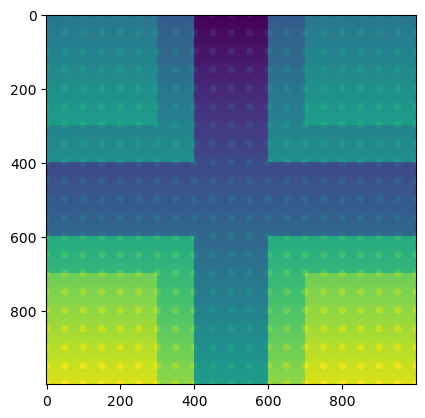

In [3]:
import matplotlib.pyplot as plt


plt.imshow(sample)

# 선

In [55]:
# ---------- 1) Probabilistic Hough (line segments) ----------
def detect_lines_houghP(
    arr_float2d,
    canny_low=50, canny_high=150,
    blur_ksize=3, median_blur=False,
    rho=1, theta=np.pi/180, threshold=50,
    min_line_len=30, max_line_gap=5,
    vmin=None, vmax=None
):
    """
    반환: linesP: (N,4) int 배열  [x1,y1,x2,y2], canny: uint8
    """
    g = float_to_u8(arr_float2d, vmin, vmax)
    # 노이즈 억제
    if blur_ksize and blur_ksize > 0:
        if median_blur: g = cv2.medianBlur(g, blur_ksize|1)
        else: g = cv2.GaussianBlur(g, (blur_ksize|1, blur_ksize|1), 0)
    # 엣지
    canny = cv2.Canny(g, canny_low, canny_high)
    # 허프P
    lines = cv2.HoughLinesP(
        canny, rho=rho, theta=theta, threshold=threshold,
        minLineLength=min_line_len, maxLineGap=max_line_gap
    )
    if lines is None:
        return np.empty((0,4), dtype=int), canny
    return lines.reshape(-1,4).astype(int), canny

# ---------- 2) Standard Hough (infinite lines as (rho, theta)) ----------
def detect_lines_hough_std(
    arr_float2d,
    canny_low=50, canny_high=150,
    blur_ksize=3, median_blur=False,
    rho=1, theta=np.pi/180, threshold=120,
    vmin=None, vmax=None
):
    """
    반환: lines: (N,1,2) float -> 편의상 (N,2) float로 변환 [(rho,theta)], canny
    """
    g = float_to_u8(arr_float2d, vmin, vmax)
    if blur_ksize and blur_ksize > 0:
        if median_blur: g = cv2.medianBlur(g, blur_ksize|1)
        else: g = cv2.GaussianBlur(g, (blur_ksize|1, blur_ksize|1), 0)
    canny = cv2.Canny(g, canny_low, canny_high)
    lines = cv2.HoughLines(canny, rho=rho, theta=theta, threshold=threshold)
    if lines is None:
        return np.empty((0,2), dtype=np.float32), canny
    return lines[:,0,:].astype(np.float32), canny  # (N,2): (rho, theta)

# ---------- 3) LSD (Line Segment Detector) ----------
def detect_lines_lsd(arr_float2d, scale=1.0, sigma_scale=0.8, quant=2.0, ang_th=22.5, log_eps=0.0,
                     density_th=0.7, n_bins=1024, vmin=None, vmax=None):
    """
    OpenCV LSD: 선분 검출. Canny 불필요.
    반환: lines: (N,4) float [x1,y1,x2,y2]
    """
    g = float_to_u8(arr_float2d, vmin, vmax)
    detector = cv2.createLineSegmentDetector()
    lines, _, _, _ = detector.detect(g)
    if lines is None:
        return np.empty((0,4), dtype=np.float32)
    return lines.reshape(-1,4).astype(np.float32)

# ---------- 시각화 ----------
def draw_linesP_on_float(arr_float2d, linesP, color=(0,255,0), thickness=2, vmin=None, vmax=None):
    base = float_to_u8(arr_float2d, vmin, vmax)
    vis = cv2.cvtColor(base, cv2.COLOR_GRAY2BGR)
    for x1,y1,x2,y2 in linesP:
        cv2.line(vis, (int(x1),int(y1)), (int(x2),int(y2)), color, thickness, cv2.LINE_AA)
    return vis

def draw_hough_std_on_float(arr_float2d, lines_rho_theta, color=(0,0,255), thickness=1, vmin=None, vmax=None):
    """
    표준 허프 (rho,theta) 무한 직선을 이미지 경계까지 그려줌
    """
    base = float_to_u8(arr_float2d, vmin, vmax)
    vis = cv2.cvtColor(base, cv2.COLOR_GRAY2BGR)
    H, W = base.shape
    for rho, theta in lines_rho_theta:
        print(rho, theta)
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        # 화면 밖으로 길게 그려 경계선과 교차
        x1, y1 = int(x0 + 10000*(-b)), int(y0 + 10000*(a))
        x2, y2 = int(x0 - 10000*(-b)), int(y0 - 10000*(a))
        cv2.line(vis, (x1,y1), (x2,y2), color, thickness, cv2.LINE_AA)
    return vis

def overlay_canny(arr_float2d, canny_u8, color=(255,0,0), alpha=0.5, vmin=None, vmax=None):
    base = float_to_u8(arr_float2d, vmin, vmax)
    rgb = cv2.cvtColor(base, cv2.COLOR_GRAY2BGR)
    overlay = rgb.copy()
    overlay[canny_u8 > 0] = color
    out = cv2.addWeighted(overlay, alpha, rgb, 1-alpha, 0)
    return out

In [57]:
arr = sample
# 1) HoughLinesP
linesP, canny = detect_lines_houghP(arr, canny_low=30, canny_high=70,
                                    rho=1, theta=np.pi/180, threshold=60,
                                    min_line_len=60, max_line_gap=10)
visP = draw_linesP_on_float(arr, linesP)
visC = overlay_canny(arr, canny)

# 2) Standard Hough (무한 직선)
linesRT, canny2 = detect_lines_hough_std(arr, threshold=150)
visStd = draw_hough_std_on_float(arr, linesRT)

# 3) LSD
linesL = detect_lines_lsd(arr)
visL = draw_linesP_on_float(arr, linesL.astype(int), color=(0,200,255))

# 화면 표시(원하면)
cv2.imshow("HoughP", visP); cv2.imshow("Canny", visC)
cv2.imshow("Hough Std", visStd); cv2.imshow("LSD", visL)
cv2.waitKey(0); cv2.destroyAllWindows()


599.0 0.0
399.0 1.5707964
599.0 1.5707964
399.0 0.0


# 원점 탐지

In [ ]:
import numpy as np
import cv2

def _normalize_to_uint8(arr: np.ndarray) -> np.ndarray:
    """실수 2D 배열을 0~255의 uint8 이미지로 정규화"""
    arr = np.asarray(arr, dtype=np.float32)
    mn, mx = np.nanmin(arr), np.nanmax(arr)
    if not np.isfinite(mn) or not np.isfinite(mx) or mx - mn < 1e-12:
        # 상수 배열 혹은 NaN만 있는 경우 대비
        return np.zeros(arr.shape, dtype=np.uint8)
    norm = (arr - mn) / (mx - mn)
    img8 = np.clip(norm * 255.0, 0, 255).astype(np.uint8)
    return img8

def _classify_lines(lines, angle_tol_deg=10):
    """
    HoughLines 결과(rho, theta)에서 수평(≈0° 또는 180°) / 수직(≈90°) 분류
    반환: (horizontals, verticals) 각 리스트는 [(rho, theta), ...]
    """
    horizontals, verticals = [], []
    if lines is None:
        return horizontals, verticals
    for l in lines:
        rho, theta = l[0]
        deg = np.degrees(theta)
        # OpenCV Hough에서 theta는 [0, π)
        if (deg < angle_tol_deg) or (deg > 180 - angle_tol_deg):
            horizontals.append((rho, theta))
        elif abs(deg - 90) < angle_tol_deg:
            verticals.append((rho, theta))
    return horizontals, verticals

def _pick_two_farthest_by_coordinate(lines, orientation="vertical"):
    """
    같은 방향의 직선 후보들에서 서로 가장 떨어진 두 개 선택.
    - vertical: x = rho / cos(theta)
    - horizontal: y = rho / sin(theta)
    반환: (picked_lines, coords)  (coords는 선택된 두 직선의 x 또는 y 좌표)
    """
    if len(lines) == 0:
        return [], []
    # 좌표로 변환
    coords = []
    for (rho, theta) in lines:
        c, s = np.cos(theta), np.sin(theta)
        if orientation == "vertical":
            if abs(c) < 1e-6:  # 분모 방지
                continue
            x = rho / c
            coords.append((rho, theta, float(x)))
        else:
            if abs(s) < 1e-6:
                continue
            y = rho / s
            coords.append((rho, theta, float(y)))

    if len(coords) == 0:
        return [], []

    # 좌표 기준 정렬 후 양 끝 두 개를 채택 (가장 멀리 떨어진 쌍)
    coords.sort(key=lambda t: t[2])
    if len(coords) == 1:
        chosen = coords
    else:
        # 양 끝
        chosen = [coords[0], coords[-1]]

    picked_lines = [(rho, theta) for (rho, theta, _) in chosen]
    picked_coords = [v for (_, _, v) in chosen]
    return picked_lines, picked_coords

def _intersections_from_four_lines(h_lines, v_lines):
    """
    두 수평선, 두 수직선이 있을 때 네 모서리 교차점 4개를 반환.
    각 수평선 y=..., 각 수직선 x=...
    """
    pts = []
    # 수평선 y 값들
    ys = []
    for (rho, theta) in h_lines:
        s = np.sin(theta)
        y = rho / s
        ys.append(float(y))
    # 수직선 x 값들
    xs = []
    for (rho, theta) in v_lines:
        c = np.cos(theta)
        x = rho / c
        xs.append(float(x))
    for y in ys:
        for x in xs:
            pts.append((x, y))
    return pts  # [(x,y), ...]

# ---------- 2) Standard Hough (infinite lines as (rho, theta)) ----------
def detect_lines_hough_std(
    arr_float2d,
    canny_low=50, canny_high=150,
    blur_ksize=3, median_blur=False,
    rho=1, theta=np.pi/180, threshold=120,
    vmin=None, vmax=None
):
    """
    반환: lines: (N,1,2) float -> 편의상 (N,2) float로 변환 [(rho,theta)], canny
    """
    g = float_to_u8(arr_float2d, vmin, vmax)
    if blur_ksize and blur_ksize > 0:
        if median_blur: g = cv2.medianBlur(g, blur_ksize|1)
        else: g = cv2.GaussianBlur(g, (blur_ksize|1, blur_ksize|1), 0)
    canny = cv2.Canny(g, canny_low, canny_high)
    lines = cv2.HoughLines(canny, rho=rho, theta=theta, threshold=threshold)
    if lines is None:
        return np.empty((0,2), dtype=np.float32), canny
    return lines

def detect_cross_center(
    arr2d: np.ndarray,
    canny_low: int = 30,
    canny_high: int = 70,
    hough_rho: float = 1.0,
    hough_theta: float = np.pi / 180.0,
    hough_thresh: int = 60,
    angle_tol_deg: float = 10.0,
    return_debug: bool = False
):
    """
    두 수평선 + 두 수직선이 만드는 '십자 교차 구역'의 중심을 원점으로 탐지.
    반환:
      - center_rc: (row0, col0) = (y0, x0)  (이미지 좌표계 기준)
      - result: {'h_lines':[(rho,theta)*2], 'v_lines':[(rho,theta)*2],
                 'corners':[(x,y)*4], 'center_xy':(x0,y0)}
      - (옵션) debug 이미지들
    """
    img8 = _normalize_to_uint8(arr2d)
    # 부드럽게 한 뒤 Canny
    blurred = cv2.GaussianBlur(img8, (3, 3), 0)
    edges = cv2.Canny(blurred, canny_low, canny_high, L2gradient=True)

    # 표준 허프 직선
    lines = detect_lines_hough_std(arr2d)

    # 수평/수직 분류
    h_lines_all, v_lines_all = _classify_lines(lines, angle_tol_deg=angle_tol_deg)

    # 각각 2개 뽑기 (멀리 떨어진 두 개)
    h_lines, h_coords = _pick_two_farthest_by_coordinate(h_lines_all, orientation="horizontal")
    v_lines, v_coords = _pick_two_farthest_by_coordinate(v_lines_all, orientation="vertical")

    if len(h_lines) < 2 or len(v_lines) < 2:
        raise RuntimeError(
            f"직선 검출 실패: 수평 {len(h_lines)}개, 수직 {len(v_lines)}개. "
            f"canny/hough/angle_tol 파라미터를 조정해 보세요."
        )

    # 네 모서리 교차점과 중심
    corners = _intersections_from_four_lines(h_lines, v_lines)  # 4개
    x_center = float(np.mean(v_coords))  # 두 수직선 x 평균
    y_center = float(np.mean(h_coords))  # 두 수평선 y 평균

    # 이미지 좌표계(row, col) = (y, x)
    center_rc = (y_center, x_center)

    result = {
        "h_lines": h_lines,
        "v_lines": v_lines,
        "corners": corners,          # [(x,y)*4]
        "center_xy": (x_center, y_center)
    }

    if not return_debug:
        return center_rc, result

    # 디버그용 컬러 오버레이
    h, w = img8.shape
    overlay = cv2.cvtColor(img8, cv2.COLOR_GRAY2BGR)

    def draw_rho_theta_line(img, rho, theta, color, thickness=1):
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        # 좌표계 충분히 크게 두 점 지정
        pt1 = (int(x0 + 10000 * (-b)), int(y0 + 10000 * (a)))
        pt2 = (int(x0 - 10000 * (-b)), int(y0 - 10000 * (a)))
        cv2.line(img, pt1, pt2, color, thickness)

    # 수평선(파랑), 수직선(초록)
    for (rho, theta) in h_lines:
        draw_rho_theta_line(overlay, rho, theta, (255, 0, 0), 2)
    for (rho, theta) in v_lines:
        draw_rho_theta_line(overlay, rho, theta, (0, 255, 0), 2)

    # 코너(노랑), 중심(빨강)
    for (x, y) in corners:
        cv2.circle(overlay, (int(round(x)), int(round(y))), 4, (0, 255, 255), -1)
    cv2.circle(overlay, (int(round(x_center)), int(round(y_center))), 5, (0, 0, 255), -1)

    debug = {
        "img8": img8,
        "blurred": blurred,
        "edges": edges,
        "overlay": overlay
    }
    return center_rc, result, debug

# ===== 사용 예시 =====
if __name__ == "__main__":
    test = sample

    (y0, x0), res, dbg = detect_cross_center(test, return_debug=True)

    print("Center (row, col) =", (y0, x0))                 # (225, 300) 근사
    print("Corners (x,y) =", res["corners"])               # 네 모서리
    print("Center (x,y) =", res["center_xy"])

    # 디버그 보기 (원하면 주석 해제)
    cv2.imshow("edges", dbg["edges"])
    cv2.imshow("overlay", dbg["overlay"])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


ValueError: not enough values to unpack (expected 4, got 2)